# Heart Rate - Physical Event - Physical Health

## Library

In [4]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
from shapely.geometry import LineString
import geopandas as gpd
from folium.plugins import PolyLineTextPath
import branca.colormap as cm
from datetime import datetime, timedelta

In [5]:
# Importamos el Activity_Event_
with open('data_sources/simulation/physical_health/events/heart_rate.json') as file:
    data = json.load(file)

## Event

Event date: June 9, 2024 at 16:43
Heart Rate Average: 138 bpm.
Heart Rate Maximus: 159 bpm.
Heart Rate Minimus: 70 bpm.


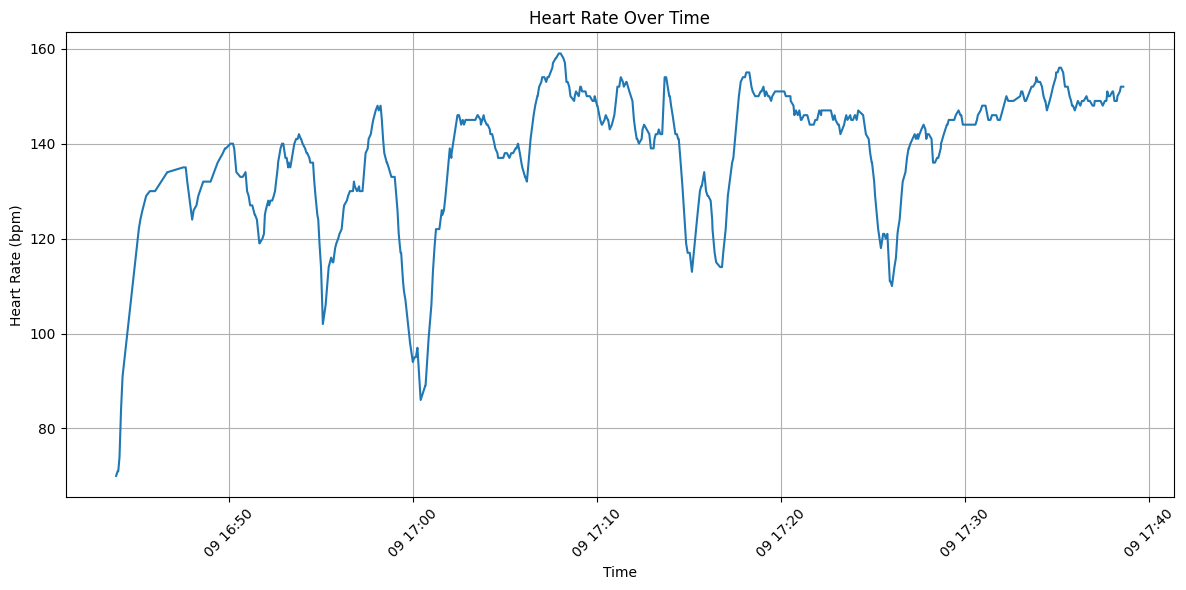

In [7]:
hr_avg = data['physical_health']['events']['heart_rate_event']['heart_rate']['hr_avg_bpm_int']
hr_max = data['physical_health']['events']['heart_rate_event']['heart_rate']['hr_maximum_bpm_int']
hr_min = data['physical_health']['events']['heart_rate_event']['heart_rate']['hr_minimum_bpm_int']
hr_granular = data['physical_health']['events']['heart_rate_event']['heart_rate']['hr_granular_data_array']
original_date = data['physical_health']['events']['heart_rate_event']['metadata']['datetime_string']

def translate_date(date_str):
    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    dt = datetime.fromisoformat(date_str.replace("Z", "+00:00"))
    return f"{months[dt.month - 1]} {dt.day}, {dt.year} at {dt.hour:02d}:{dt.minute:02d}"
translated_date = translate_date(original_date)

# HR avg
if hr_avg is None:
    hr_avg_result = "Heart Rate Average: No values ​​were obtained or it is null."
else:
    hr_avg_result = f'Heart Rate Average: {hr_avg} bpm.'

# HR maximus
if hr_max is None:
    hr_max_result = "Heart Rate Maximus: No values ​​were obtained or it is null."
else:
    hr_max_result = f'Heart Rate Maximus: {hr_max} bpm.'
    
# HR minimus
if hr_min is None:
    hr_min_result = "Heart Rate Minimus: No values ​​were obtained or it is null."
else:
    hr_min_result = f'Heart Rate Minimus: {hr_min} bpm.'

print(f"Event date: {translated_date}")
print(hr_avg_result)
print(hr_max_result)
print(hr_min_result)

# Prepare data for plotting
datetimes = [datetime.fromisoformat(item['datetime_string']) for item in hr_granular]
heart_rates = [item['hr_bpm_int'] for item in hr_granular]

if hr_granular:
    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(datetimes, heart_rates, linestyle='-')
    plt.title('Heart Rate Over Time')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate (bpm)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
else:
    # Display message instead of graphic
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, 'Heart Reate Chart: No granular information available', 
             horizontalalignment='center', verticalalignment='center', fontsize=12)
    plt.axis('off')
    plt.show()